Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Load the Wine dataset directly into your Jupyter Notebook with the following snippet:

In [4]:
data = 'data/wine.csv'
# Alternatively, it can be downloaded directly
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# The dataset has no header; add column names as provided in the UCI repository documentation.
columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
           'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
           'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(data, header=None, names=columns)
data.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

 Visualization: Use scatter plots or pair plots (with tools like seaborn’s pairplot) to explore how the features distinguish between the three wine classes.

Feature Insight: Briefly analyze key chemical properties and their distributions across the classes.

In [5]:
data.describe()

Class     Alcohol  Malic_acid         Ash  Alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color_intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315_of_diluted_wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [7]:
# Check for missing values
print(data.isnull().sum())

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64


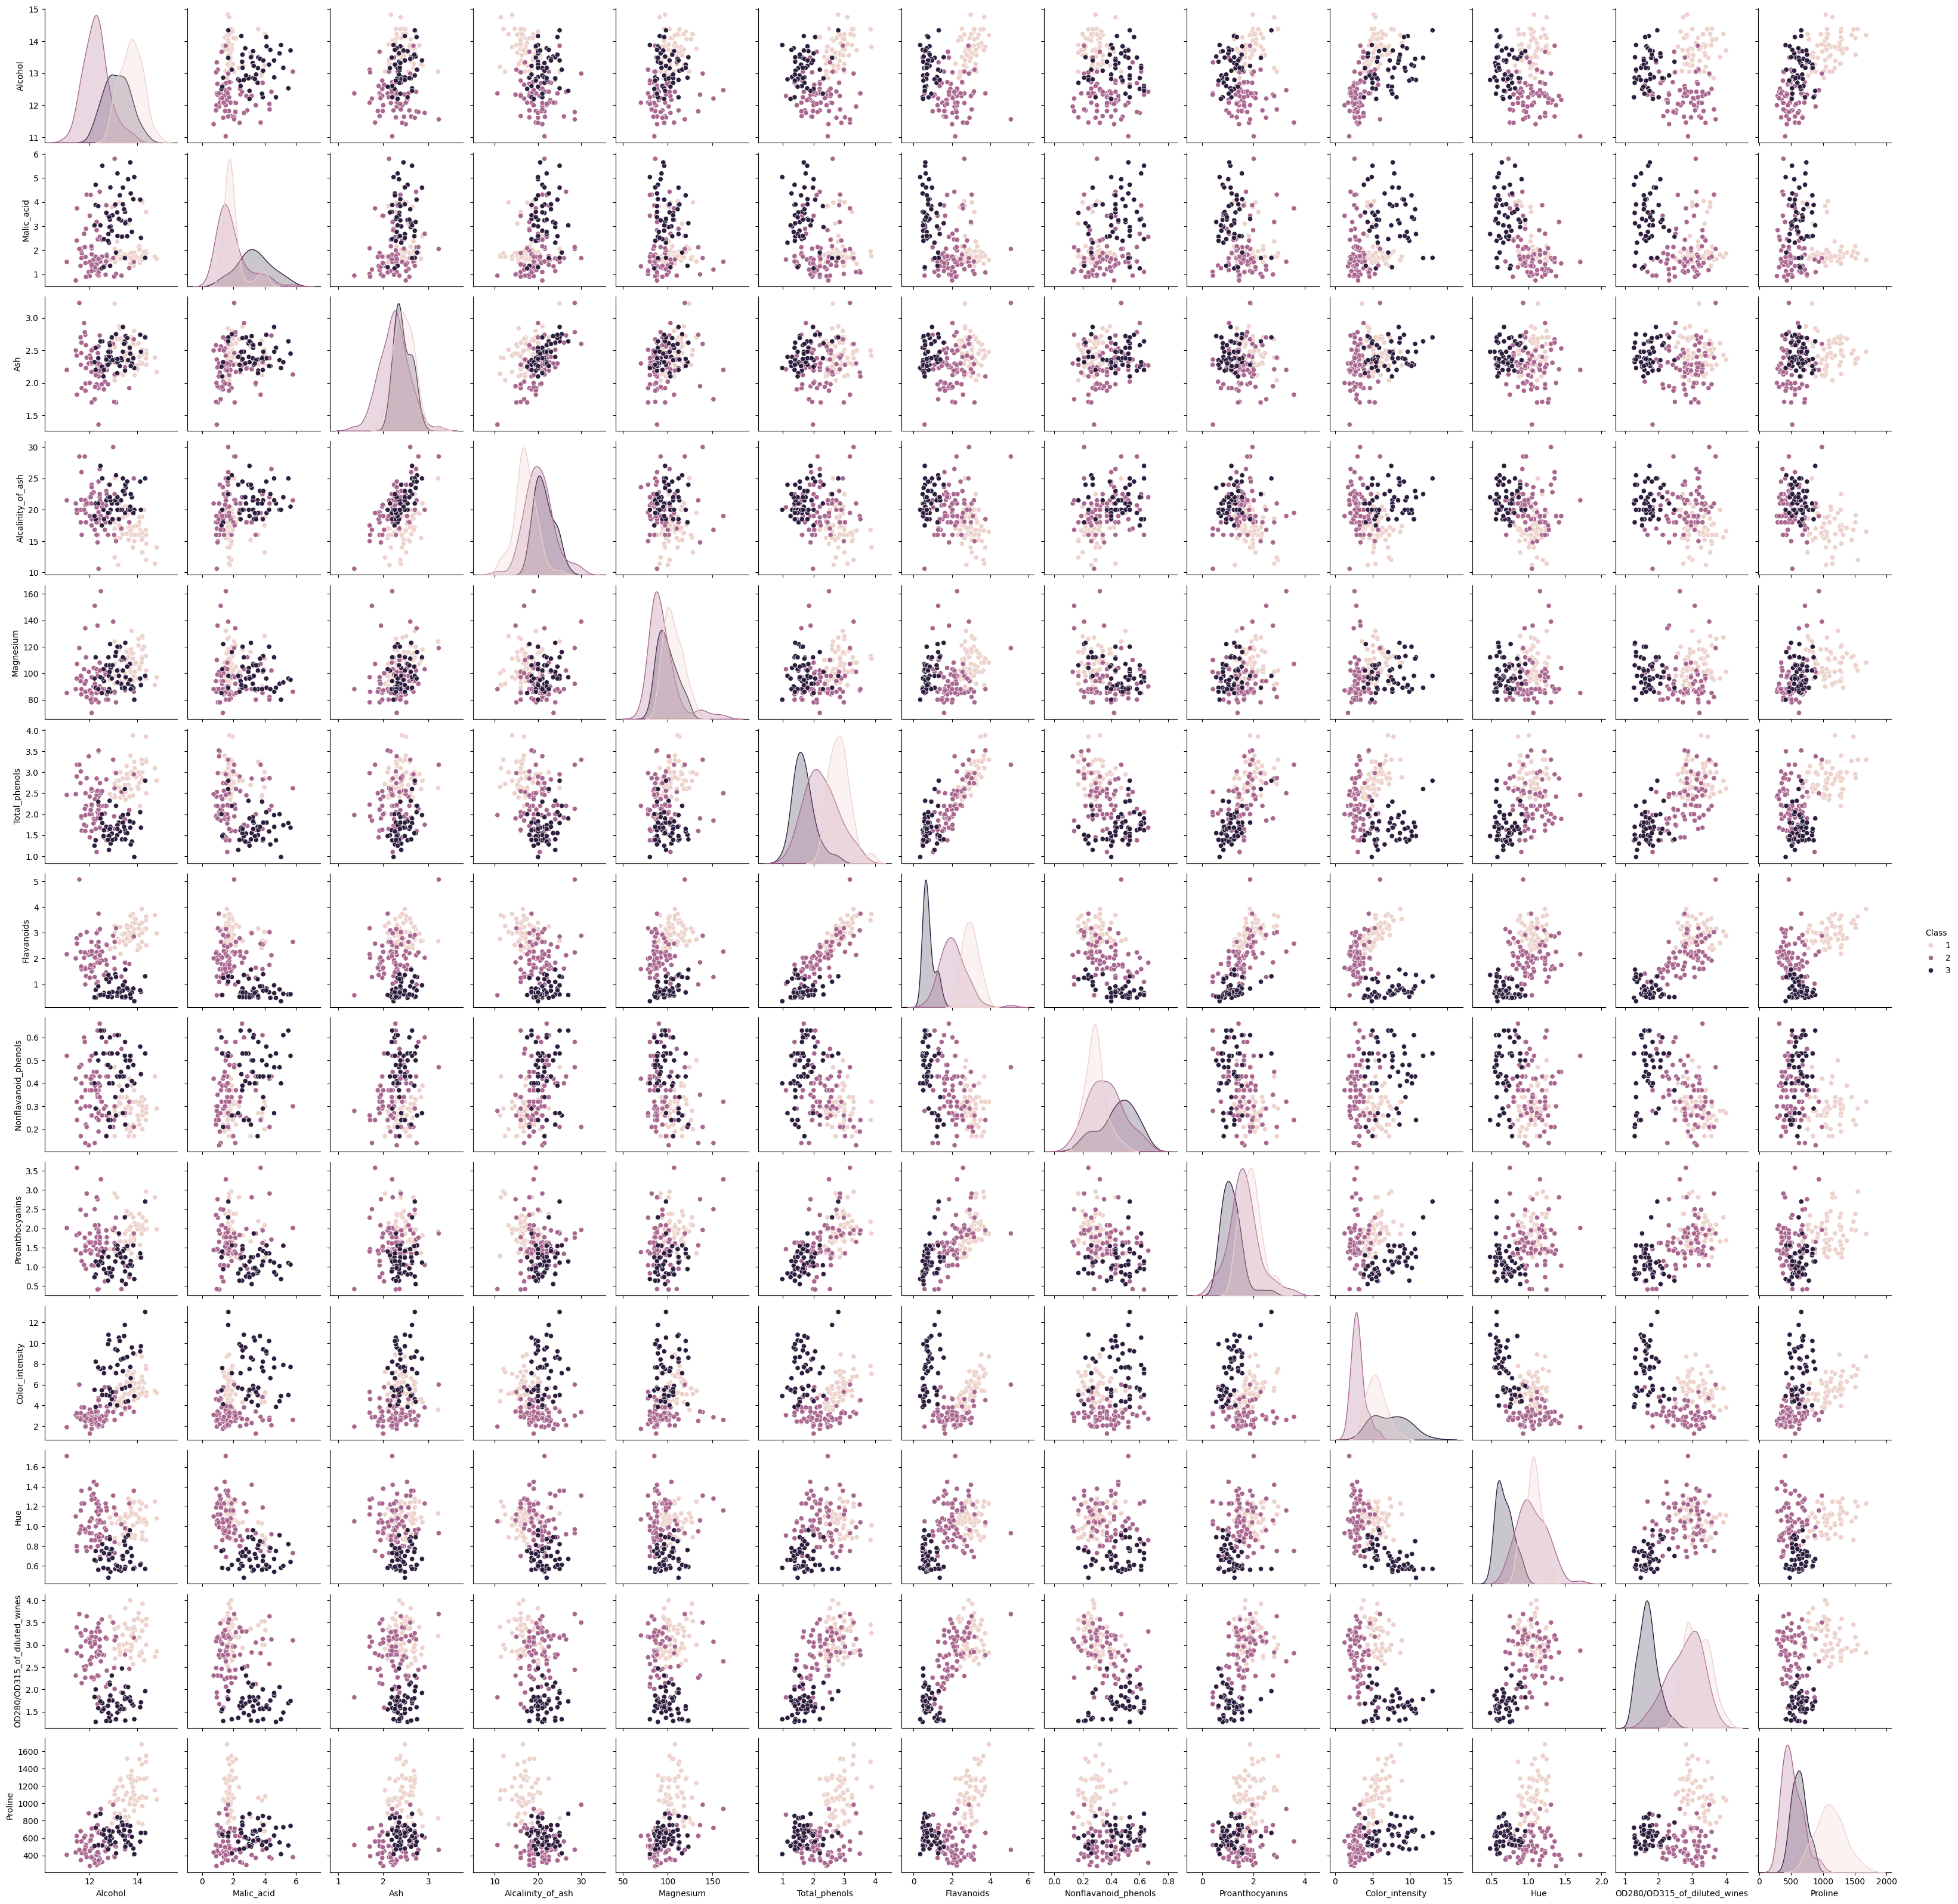

In [8]:
sns.pairplot(data, hue="Class", diag_kind="kde")
plt.show()

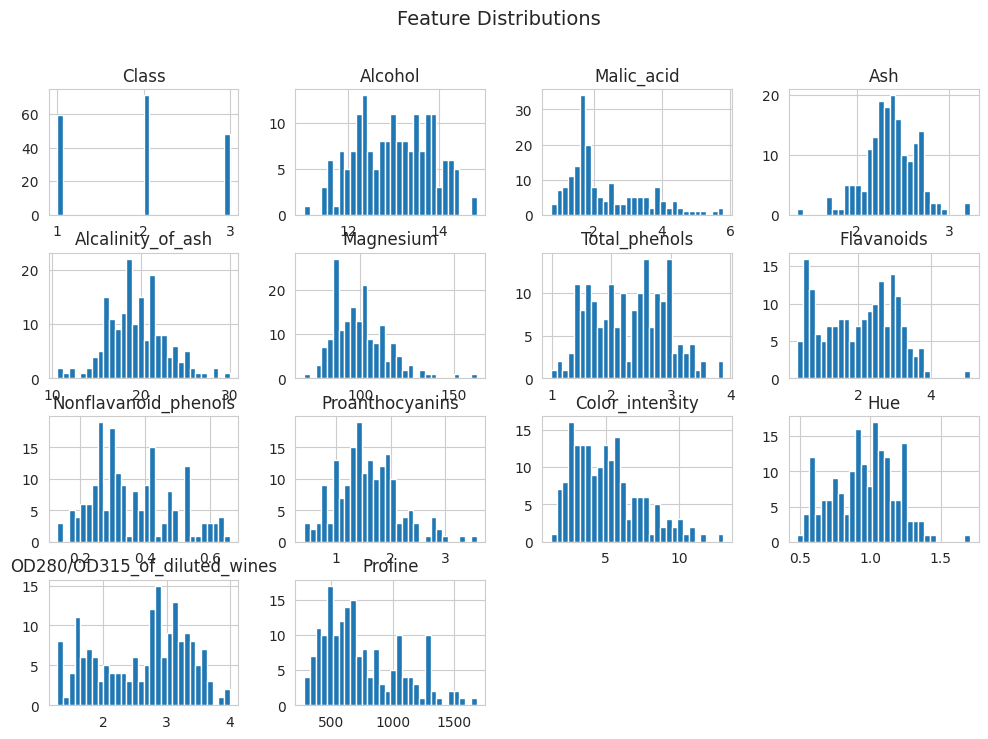

In [9]:
# Set plot style
sns.set_style("whitegrid")

# Histogram of all numeric features
data.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

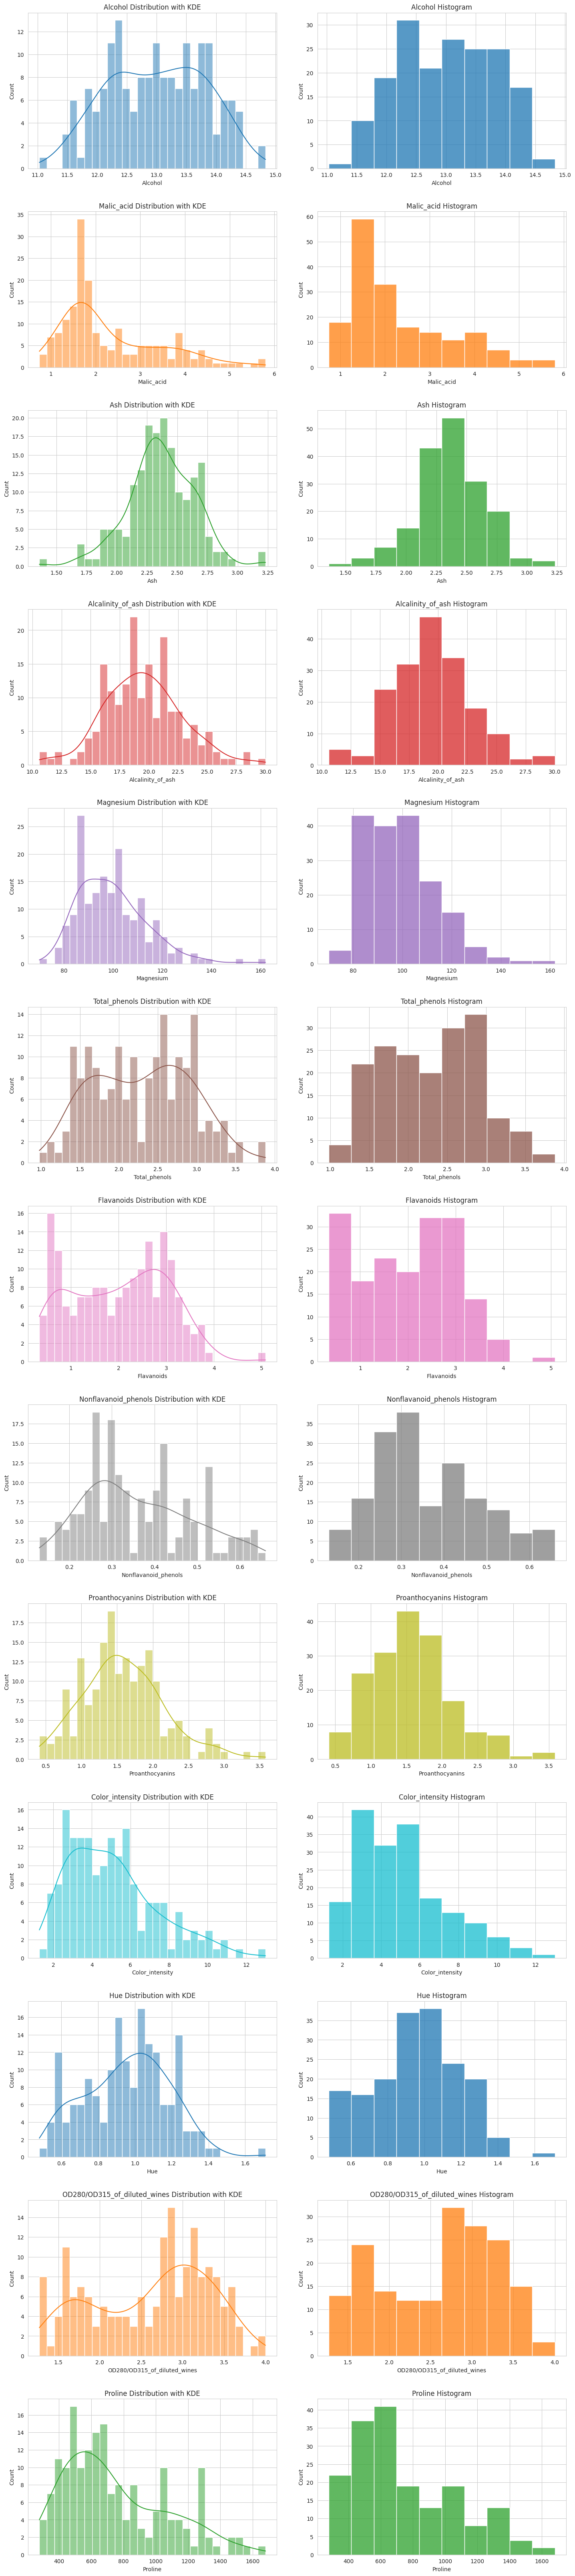

In [19]:

num_vars = len(data.columns[1:])
rows = 2
cols = 2
lines = (num_vars * 2 // cols) + (num_vars * 2 % cols > 0)

plt.figure(figsize=(15, lines * 5))  # Adjust figure height dynamically
colors = sns.color_palette()

for i, var in enumerate(data.columns[1:]):
    # Histogram with KDE
    plt.subplot(lines, cols, 2 * i + 1)
    sns.histplot(data[var], kde=True, color=colors[i % len(colors)], bins=30)
    plt.title(f'{var} Distribution with KDE')

    # Histogram without KDE
    plt.subplot(lines, cols, 2 * i + 2)
    sns.histplot(data[var], kde=False, bins=10, color=colors[i % len(colors)])
    plt.title(f'{var} Histogram')

plt.tight_layout(pad=3.0)
plt.show()
